In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# plot color values
colors = [
    "#476A2A", "#7851B8", '#BD3430',
    '#4A2D4E', '#875525', '#A83683', 
    '#4E655E', '#853541', '#3A3120', 
    '#535D8E', 'black'
] 

In [2]:
# load and prep data
def prep_data(x):
    return x.reshape(-1, 28 * 28) / 255.


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = prep_data(x_train)
x_test = prep_data(x_test)

In [3]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

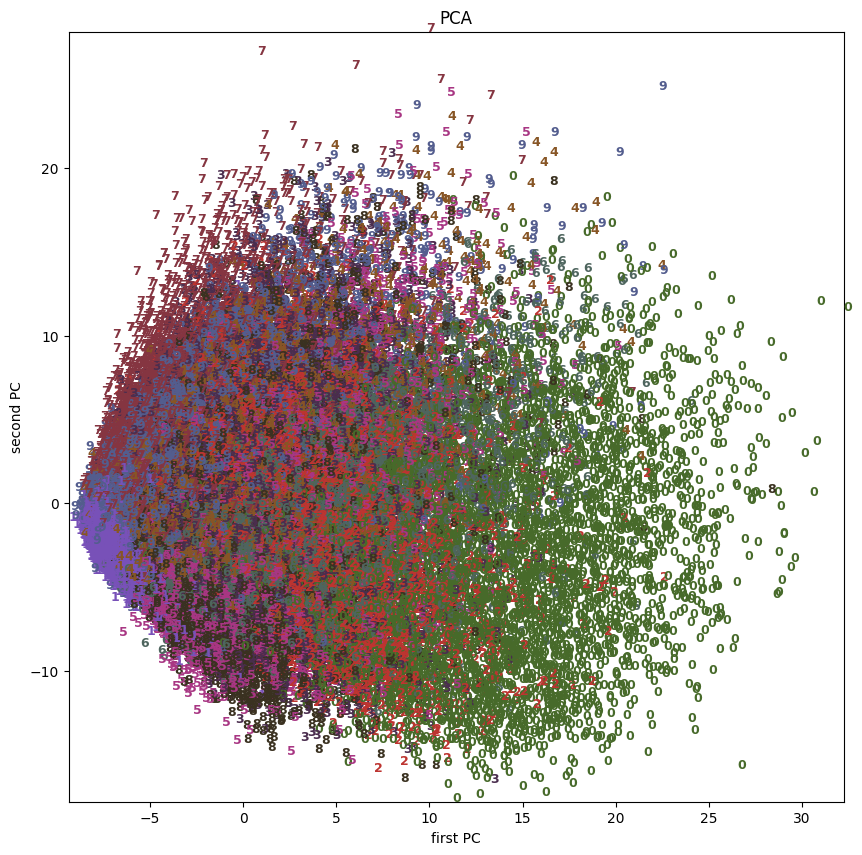

In [4]:
# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
train_pca = pca.fit_transform(x_train, y_train)
test_pca = pca.fit_transform(x_test, y_test)

# Visualize the data
plt.figure(figsize=(10,10))
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.xlim(train_pca[:, 0].min(), train_pca[:, 0].max())
plt.ylim(train_pca[:, 1].min(), train_pca[:, 1].max())

for i in range(len(x_train)):
    plt.text(
        train_pca[i, 0], train_pca[i, 1], 
        str(y_train[i]),
        color = colors[y_train[i]],
        fontdict={
            'weight': 'bold', 
            'size': 9
        }
    )

plt.show();

number of clusters in pca-DBSCAN:  1


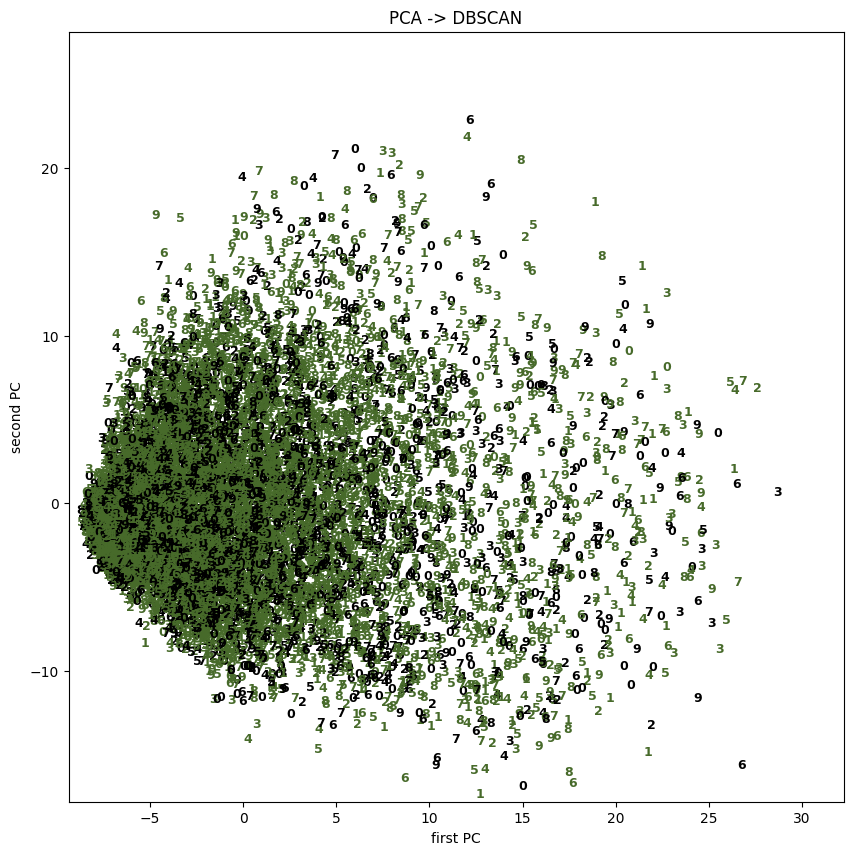

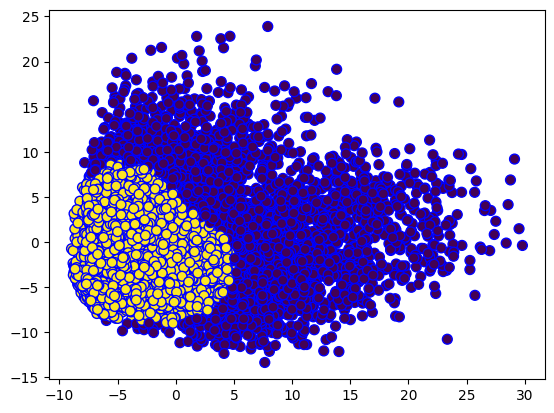

In [5]:
# DBSCAN params
minPts = 1000
eps = 3

# DBSCAN
db = DBSCAN(eps=eps, min_samples=minPts)
db = db.fit(train_pca)

labels_db = db.labels_
clusters_db = db.fit_predict(test_pca)
n_clusters_ = len(set(clusters_db)) - (1 if -1 in clusters_db else 0)

print("number of clusters in pca-DBSCAN: ", n_clusters_)

# Vizualization
plt.figure(figsize=(10,10))
plt.xlim(train_pca[:, 0].min(), train_pca[:, 0].max())
plt.ylim(train_pca[:, 1].min(), train_pca[:, 1].max())
plt.title('PCA -> DBSCAN')
plt.xlabel("first PC")
plt.ylabel("second PC")

for i in range(len(y_test)):
    plt.text(
        train_pca[i, 0], train_pca[i, 1], 
        str(y_test[i]),
        color = colors[clusters_db[i]],
        fontdict={
            'weight': 'bold', 
            'size': 9
        }
    )

plt.show(); 

plt.scatter(
    test_pca[:, 0], test_pca[:, 1], 
    c=clusters_db, 
    s=50, 
    edgecolors='b'
);